In [1]:
"""
CNN 기반 유명 네트워크
1) LeNet(1,2,...,5) : 리쿤 연구팀 1998
-CNN 계열의 최고 조상님
2) AlexNet
3) VGGNet
-VGG-(F,M,S), VGG16, VGG19,...
fast, middle, slow

"""

'\nCNN 기반 유명 네트워크\n1) LeNet(1,2,...,5) : 리쿤 연구팀 1998\n-CNN 계열의 최고 조상님\n2) AlexNet\n3) VGGNet\n-VGG-(F,M,S), VGG16, VGG19,...\nfast, middle, slow\n\n'

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16,decode_predictions

In [4]:
vgg=VGG16()
vgg.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
553467904/553467096 [==============================] - 123s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 11

In [5]:
## 캐글 위성 비행기 이미지 데이터 
# https://www.kaggle.com/rhammell/planesnet

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fashion_mnist=keras.datasets.fashion_mnist
(trainImages, trainLabels),(testImages,testLabels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
classNames=['T-shirt','Trouser','Pullover','Dress',
            'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
trainImages.shape#60000,28,28
trainLabels.shape
testImages.shape#10000,28,28
testLabels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

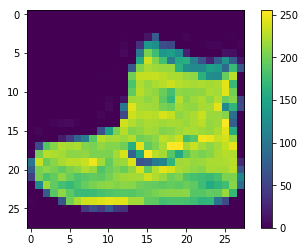

9

In [19]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.show()
trainLabels[0]

In [20]:
trainImage=trainImages/255.0
testImages=testImages/255.0

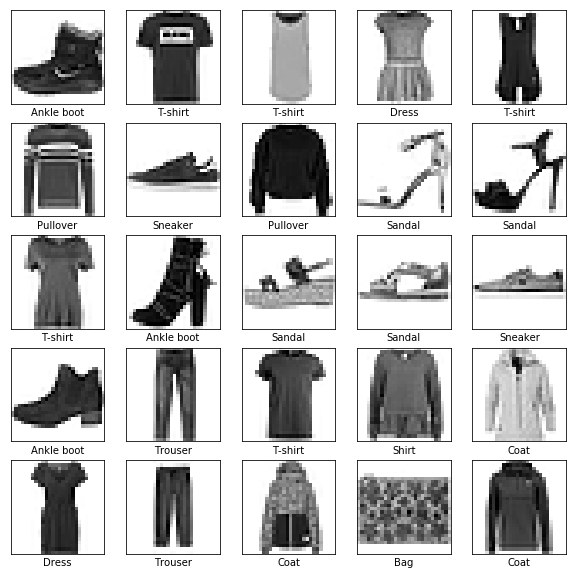

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainImages[i],cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [28]:
from keras.layers import *

Using TensorFlow backend.


In [55]:
from keras.models import Sequential

In [56]:
model=Sequential()

In [57]:
model.add(Flatten(input_shape=(28,28)))
#Flatten:28*28(2차원배열)->784픽셀(1차원배열)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [58]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [59]:
model.fit(trainImages, trainLabels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 3.0445 - accuracy: 0.7173
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.6579 - accuracy: 0.7750
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.5822 - accuracy: 0.7970
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.5349 - accuracy: 0.8124
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.5231 - accuracy: 0.8177


In [60]:
# 1.층 설정(Sequential, Dense,...)
# 2.모델 설정(model.compile(opt, loss, met))
# 3.모델 훈련(fit)
# 4.평가(evaluate)
testLoss,testAcc=model.evaluate(
    testImages,testLabels)
print(testAcc)

10000/10000 [==============================] - 0s 26us/step
0.10000000149011612


In [61]:
pre=model.predict(testImages)

In [62]:
classNames[np.argmax(pre[0])]

'Shirt'

In [63]:
#오후 연습문제
"""
1.
예측이미지 / 실제이미지 많이 틀린 이미지 출력
부츠(0)  신발 : 3
티셔츠 신발 : 5
...
(9)    신발

정답 : 신발, 예측을 잘못한 모든 케이스에 대해
어떤 예측으로 했는지 출력(최대값)

2.
fashion mnist 구현(신경망) -> CNN

3.
비행기 인식


"""

'\n예측이미지 / 실제이미지 많이 틀린 이미지 출력\n부츠(0)  신발 : 3\n티셔츠 신발 : 5\n...\n(9)    신발\n\n정답 : 신발, 예측을 잘못한 모든 케이스에 대해\n어떤 예측으로 했는지 출력(최대값)\n\n'

In [35]:
from PIL import Image

In [71]:
img=np.array(Image.open("C:/Users/student/Downloads/Python_JP/catdog/train/cat.183.jpg").resize((224,224)))

In [72]:
yhat=vgg.predict(img.reshape(-1,224,224,3))

In [73]:
labelIdx=np.argmax(yhat)#1,1000

In [75]:
label=decode_predictions(yhat)
np.shape(label)#1,5,3
print("예상품종 : ",label[0][0][1])
print("확률 : ",label[0][0][2])
label

예상품종 :  Egyptian_cat
확률 :  0.39979804


[[('n02124075', 'Egyptian_cat', 0.39979804),
  ('n02123597', 'Siamese_cat', 0.15658198),
  ('n04522168', 'vase', 0.14236978),
  ('n02948072', 'candle', 0.09867198),
  ('n02123045', 'tabby', 0.039914828)]]

In [77]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'C:/Users/student/Downloads/Python_JP/catdog/train/cat.183.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02124075', 'Egyptian_cat', 0.4956735), ('n02123045', 'tabby', 0.31311294), ('n02123159', 'tiger_cat', 0.14668663)]
